In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'..\data\LifeExpectancyData.csv')

In [3]:
df.columns.to_list()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [4]:
# Clean column names
df.columns = (df.columns.str.strip()
    .str.replace(' ','_')
    .str.replace('__','_')
    .str.replace('-','_'))

df.columns.to_list()

['Country',
 'Year',
 'Status',
 'Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under_five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness_1_19_years',
 'thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling']

In [5]:
# Inspect basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.duplicated().sum()

np.int64(0)

## Data Cleaning

In [8]:
total_counts = df.groupby('Country').size()

def missing_rep(x):
    missing_counts= df[df[x].isnull()].groupby('Country').size()
    # Compute missing-value ratio
    missing_ratio = (missing_counts / total_counts).fillna(0)
    missing_report = pd.DataFrame({
        'Total_Records': total_counts,
        'Missing_Records': missing_counts.reindex(total_counts.index, fill_value=0),
        'Missing_Percentage': missing_ratio * 100
    })
    missing_report_filtered = missing_report[missing_report['Missing_Records'] > 0].sort_values(by='Missing_Percentage', ascending=False)
    return missing_report_filtered

In [9]:
# Life_expectancy
mr = missing_rep('Life_expectancy')
mr_drop = mr[mr['Missing_Percentage']==100]
mr_else = mr[mr['Missing_Percentage']!=100]
mr_drop

,Total_Records,Missing_Records,Missing_Percentage
Country,,,
Cook Islands,1,1,100.0
Dominica,1,1,100.0
Marshall Islands,1,1,100.0
Monaco,1,1,100.0
Nauru,1,1,100.0
Niue,1,1,100.0
Palau,1,1,100.0
Saint Kitts and Nevis,1,1,100.0
San Marino,1,1,100.0


In [10]:
# Each has only 1 record (100%); drop them—overall impact is small
df=df[~df['Country'].isin(mr_drop.index)]

In [11]:
df['Country'].nunique()

183

In [12]:
df.isnull().sum().sort_values(ascending=False)

Population                         644
Hepatitis_B                        553
GDP                                443
Total_expenditure                  226
Alcohol                            193
Income_composition_of_resources    160
Schooling                          160
thinness_1_19_years                 32
thinness_5_9_years                  32
BMI                                 32
Diphtheria                          19
Polio                               19
Year                                 0
Country                              0
infant_deaths                        0
Adult_Mortality                      0
Life_expectancy                      0
Status                               0
under_five_deaths                    0
Measles                              0
percentage_expenditure               0
HIV/AIDS                             0
dtype: int64

In [13]:
mr_Pop = missing_rep('Population')
mr_Pop_drop = mr_Pop[mr_Pop['Missing_Percentage']==100]
mr_Pop_else = mr_Pop[mr_Pop['Missing_Percentage']!=100]
mr_Pop_drop

,Total_Records,Missing_Records,Missing_Percentage
Country,,,
Antigua and Barbuda,16,16,100.0
Bahamas,16,16,100.0
Bahrain,16,16,100.0
Barbados,16,16,100.0
Bolivia (Plurinational State of),16,16,100.0
Brunei Darussalam,16,16,100.0
Congo,16,16,100.0
Cuba,16,16,100.0
Czechia,16,16,100.0


In [14]:
df=df[~df['Country'].isin(mr_Pop_drop.index)]
df['Country'].nunique()

143

In [15]:
df[df['Country'].isin(mr_Pop_else.index)][['Country','Year','Status','Population']].sort_values(by='Year')

,Country,Year,Status,Population
865,Eritrea,2000,Developing,339281.0
864,Eritrea,2001,Developing,3497124.0
863,Eritrea,2002,Developing,3614639.0
862,Eritrea,2003,Developing,3738265.0
861,Eritrea,2004,Developing,3858623.0
860,Eritrea,2005,Developing,39697.0
859,Eritrea,2006,Developing,466648.0
858,Eritrea,2007,Developing,4153332.0
857,Eritrea,2008,Developing,4232636.0
856,Eritrea,2009,Developing,431334.0


In [16]:
df = df.sort_values(['Country', 'Year'])
# Use forward fill (Forward Fill)
df['Population'] = df.groupby('Country')['Population'].transform(lambda x: x.ffill())
# Verify Eritrea's filled results
df[df['Country'] == 'Eritrea'][['Country', 'Year', 'Population']]

,Country,Year,Population
865,Eritrea,2000,339281.0
864,Eritrea,2001,3497124.0
863,Eritrea,2002,3614639.0
862,Eritrea,2003,3738265.0
861,Eritrea,2004,3858623.0
860,Eritrea,2005,39697.0
859,Eritrea,2006,466648.0
858,Eritrea,2007,4153332.0
857,Eritrea,2008,4232636.0
856,Eritrea,2009,431334.0


In [17]:
df.isnull().sum().sort_values(ascending = False)

Hepatitis_B                        482
Alcohol                            156
Total_expenditure                  156
BMI                                 32
thinness_5_9_years                  32
thinness_1_19_years                 32
GDP                                 26
Polio                               19
Diphtheria                          19
Adult_Mortality                      0
Year                                 0
Country                              0
Life_expectancy                      0
Status                               0
infant_deaths                        0
under_five_deaths                    0
percentage_expenditure               0
Measles                              0
Population                           0
HIV/AIDS                             0
Income_composition_of_resources      0
Schooling                            0
dtype: int64

In [18]:
# Hepatitis_B
df['Hepatitis_B'].describe()

count    1806.000000
mean       79.181617
std        25.553360
min         2.000000
25%        74.000000
50%        89.000000
75%        96.000000
max        99.000000
Name: Hepatitis_B, dtype: float64

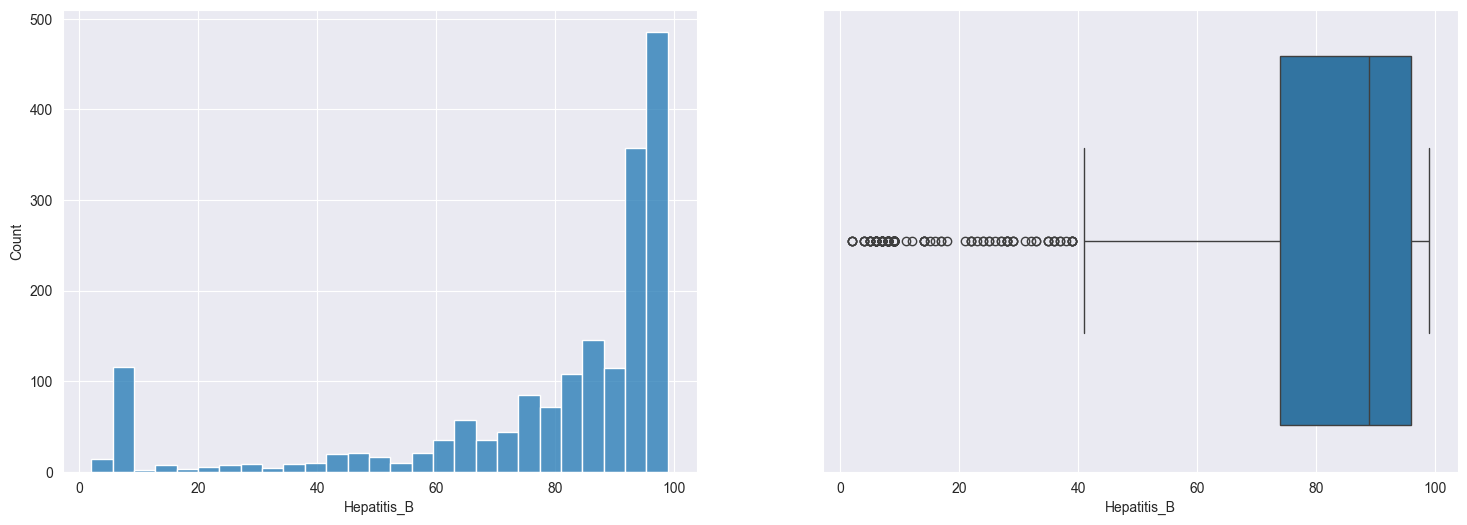

In [19]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(df['Hepatitis_B'])
plt.subplot(1,2,2)
sns.boxplot(x= df['Hepatitis_B'])
plt.show()

In [20]:
# We can keep these very small outliers; they may reflect countries with limited vaccination programs
# Missing-value distribution by development status
mr1_HB = missing_rep('Hepatitis_B')
mr1_HB_drop = mr1_HB[mr1_HB['Missing_Percentage']>=50]
mr1_HB_else = mr1_HB[mr1_HB['Missing_Percentage']<50]
mr1_HB_drop

,Total_Records,Missing_Records,Missing_Percentage
Country,,,
Denmark,16,16,100.00
Norway,16,16,100.00
Slovenia,16,16,100.00
Switzerland,16,16,100.00
Japan,16,16,100.00
Hungary,16,16,100.00
Iceland,16,16,100.00
Finland,16,16,100.00
South Sudan,16,15,93.75


In [21]:
mr1_HB_else

,Total_Records,Missing_Records,Missing_Percentage
Country,,,
Guinea,16,7,43.75
Djibouti,16,7,43.75
Sierra Leone,16,7,43.75
Croatia,16,7,43.75
Ethiopia,16,7,43.75
Angola,16,7,43.75
Montenegro,16,6,37.50
Burkina Faso,16,6,37.50
Chile,16,6,37.50


In [22]:
total_count = df.groupby('Status').size()
def missing_rep2(x):
    missing_counts= df[df[x].isnull()].groupby('Status').size()
    # Compute missing-value ratio
    missing_ratio = (missing_counts / total_count).fillna(0)
    missing_report = pd.DataFrame({
        'Total_Records': total_count,
        'Missing_Records': missing_counts.reindex(total_count.index, fill_value=0),
        'Missing_Percentage': missing_ratio * 100
    })
    missing_report_filtered = missing_report[missing_report['Missing_Records'] > 0].sort_values(by='Missing_Percentage', ascending=False)
    return missing_report_filtered

In [23]:
mr2_HB = missing_rep2('Hepatitis_B')
mr2_HB

,Total_Records,Missing_Records,Missing_Percentage
Status,,,
Developed,416,155,37.259615
Developing,1872,327,17.467949


In [24]:
# Mean imputation
df['Hepatitis_B'] = df.groupby('Status')['Hepatitis_B'].transform(lambda x: x.fillna(x.mean()))

In [25]:
df['Hepatitis_B'].isna().sum()

np.int64(0)

In [26]:
df.isnull().sum().sort_values(ascending=False)

Total_expenditure                  156
Alcohol                            156
thinness_5_9_years                  32
BMI                                 32
thinness_1_19_years                 32
GDP                                 26
Diphtheria                          19
Polio                               19
infant_deaths                        0
Adult_Mortality                      0
Year                                 0
Country                              0
Life_expectancy                      0
Status                               0
under_five_deaths                    0
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
Population                           0
HIV/AIDS                             0
Income_composition_of_resources      0
Schooling                            0
dtype: int64

In [27]:
df['Alcohol'].describe()

count    2132.000000
mean        4.683307
std         4.050638
min         0.010000
25%         0.930000
50%         4.045000
75%         7.530000
max        17.870000
Name: Alcohol, dtype: float64

<Axes: xlabel='Alcohol'>

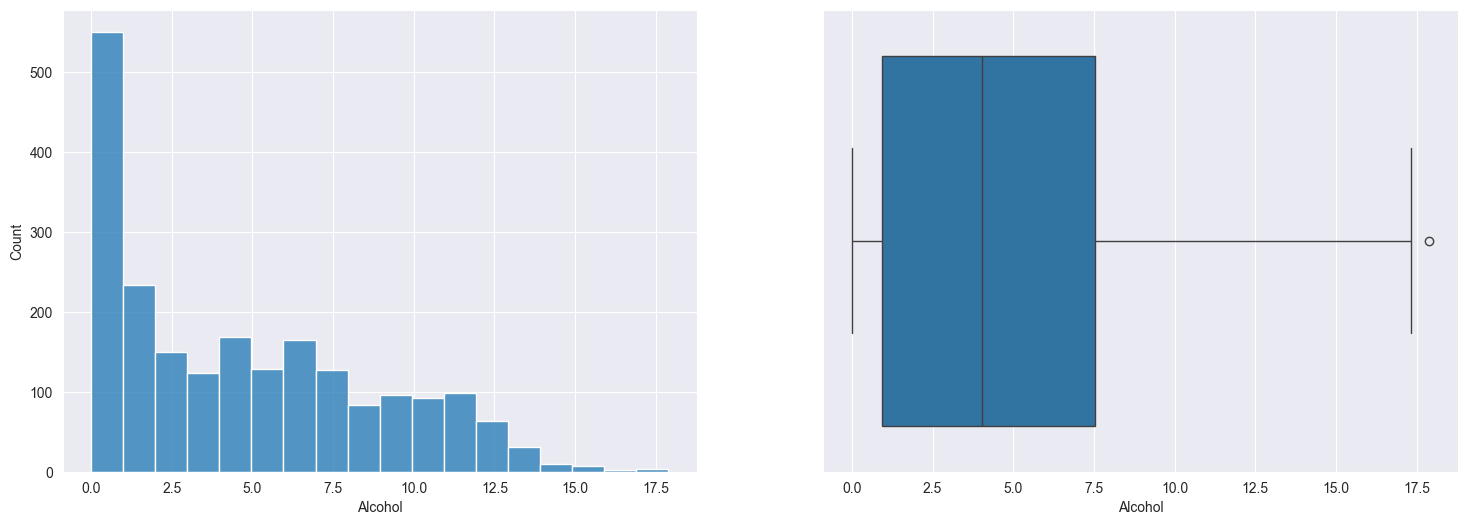

In [28]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(df['Alcohol'])
plt.subplot(1,2,2)
sns.boxplot(x= df['Alcohol'])

In [29]:
mr1_Al = missing_rep('Alcohol')
mr1_Al_drop = mr1_Al[mr1_Al['Missing_Percentage']==100]
mr1_Al_else = mr1_Al[mr1_Al['Missing_Percentage']!=100]
mr1_Al_drop

,Total_Records,Missing_Records,Missing_Percentage
Country,,,
South Sudan,16,16,100.0


In [30]:
mr1_Al_else

,Total_Records,Missing_Records,Missing_Percentage
Country,,,
Montenegro,16,2,12.50
Algeria,16,1,6.25
Angola,16,1,6.25
Australia,16,1,6.25
Austria,16,1,6.25
...,...,...,...
Uruguay,16,1,6.25
Uzbekistan,16,1,6.25
Vanuatu,16,1,6.25


In [31]:
# Mean imputation
df['Alcohol'] = df.groupby('Status')['Alcohol'].transform(lambda x: x.fillna(x.mean()))

In [32]:
df['Alcohol'].isna().sum()

np.int64(0)

In [33]:
df.isnull().sum().sort_values(ascending=False)

Total_expenditure                  156
BMI                                 32
thinness_5_9_years                  32
thinness_1_19_years                 32
GDP                                 26
Diphtheria                          19
Polio                               19
Adult_Mortality                      0
infant_deaths                        0
Status                               0
Year                                 0
Country                              0
Life_expectancy                      0
Alcohol                              0
under_five_deaths                    0
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
Population                           0
HIV/AIDS                             0
Income_composition_of_resources      0
Schooling                            0
dtype: int64

In [34]:
df['Total_expenditure'].describe()

count    2132.000000
mean        5.999353
std         2.368489
min         0.370000
25%         4.367500
50%         5.875000
75%         7.692500
max        14.390000
Name: Total_expenditure, dtype: float64

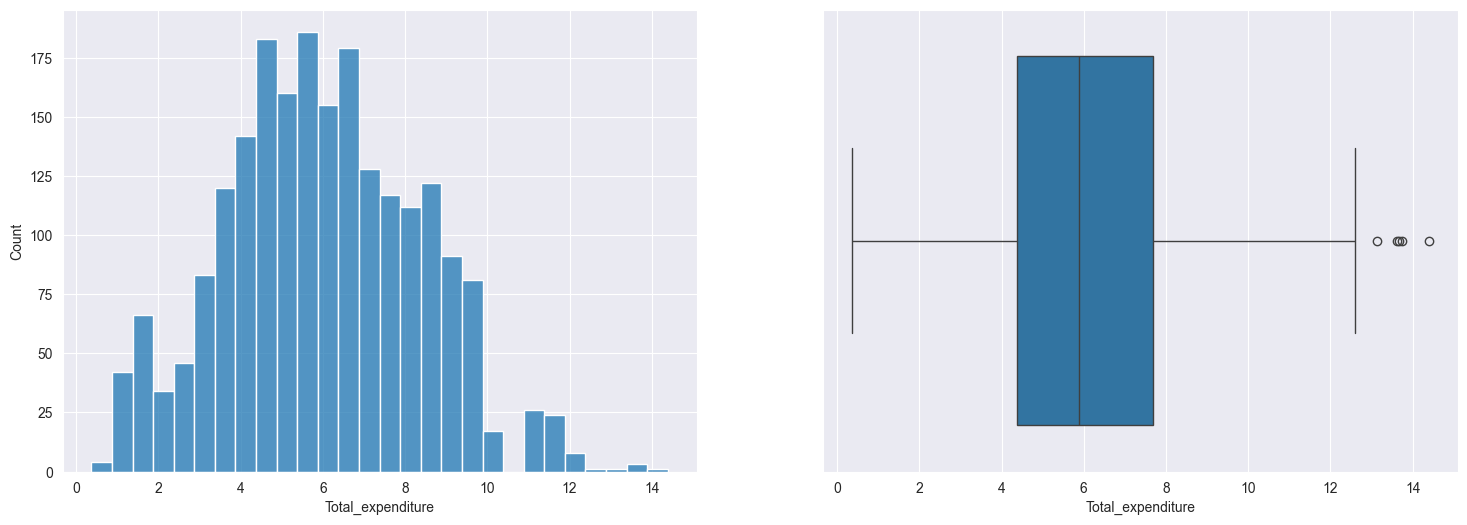

In [35]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(df['Total_expenditure'])
plt.subplot(1,2,2)
sns.boxplot(x= df['Total_expenditure'])
plt.show()

In [36]:
# Mean imputation
df['Total_expenditure'] = df.groupby('Status')['Total_expenditure'].transform(lambda x: x.fillna(x.mean()))

In [37]:
df['Total_expenditure'].isna().sum()

np.int64(0)

In [38]:
df['Status'] = df['Status'].map({
    'Developing': 0,
    'Developed': 1
})

In [39]:
# 2. Compute correlation matrix
# numeric_only=True ensures we only use numeric columns to avoid errors
corr_matrix = df.corr(numeric_only=True)
corr_matrix.style.format("{:.3f}")

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
Year,1.000,-0.000,0.172,-0.070,-0.040,-0.050,0.030,0.092,-0.098,0.097,-0.046,0.084,0.061,0.134,-0.149,0.090,0.017,-0.049,-0.054,0.232,0.206
Status,-0.000,1.000,0.509,-0.328,-0.120,0.638,0.500,0.173,-0.081,0.351,-0.122,0.252,0.272,0.248,-0.163,0.536,-0.046,-0.361,-0.361,0.522,0.548
Life_expectancy,0.172,0.509,1.000,-0.679,-0.172,0.432,0.411,0.205,-0.135,0.589,-0.198,0.438,0.236,0.458,-0.563,0.466,-0.021,-0.486,-0.479,0.760,0.767
Adult_Mortality,-0.070,-0.328,-0.679,1.000,0.052,-0.222,-0.256,-0.112,-0.002,-0.377,0.067,-0.232,-0.130,-0.230,0.532,-0.286,-0.014,0.302,0.308,-0.458,-0.451
infant_deaths,-0.040,-0.120,-0.172,0.052,1.000,-0.116,-0.089,-0.184,0.519,-0.228,0.997,-0.158,-0.148,-0.161,0.008,-0.104,0.557,0.485,0.491,-0.148,-0.196
Alcohol,-0.050,0.638,0.432,-0.222,-0.116,1.000,0.407,0.132,-0.038,0.390,-0.112,0.255,0.267,0.261,-0.053,0.454,-0.034,-0.421,-0.412,0.554,0.597
percentage_expenditure,0.030,0.500,0.411,-0.256,-0.089,0.407,1.000,0.055,-0.060,0.258,-0.092,0.163,0.238,0.163,-0.109,0.938,-0.026,-0.272,-0.274,0.406,0.412
Hepatitis_B,0.092,0.173,0.205,-0.112,-0.184,0.132,0.055,1.000,-0.092,0.147,-0.190,0.414,0.121,0.511,-0.099,0.076,-0.125,-0.130,-0.135,0.185,0.203
Measles,-0.098,-0.081,-0.135,-0.002,0.519,-0.038,-0.060,-0.092,1.000,-0.171,0.526,-0.112,-0.109,-0.116,0.022,-0.071,0.266,0.236,0.231,-0.133,-0.137
BMI,0.097,0.351,0.589,-0.377,-0.228,0.390,0.258,0.147,-0.171,1.000,-0.238,0.271,0.240,0.271,-0.241,0.308,-0.072,-0.558,-0.565,0.546,0.587


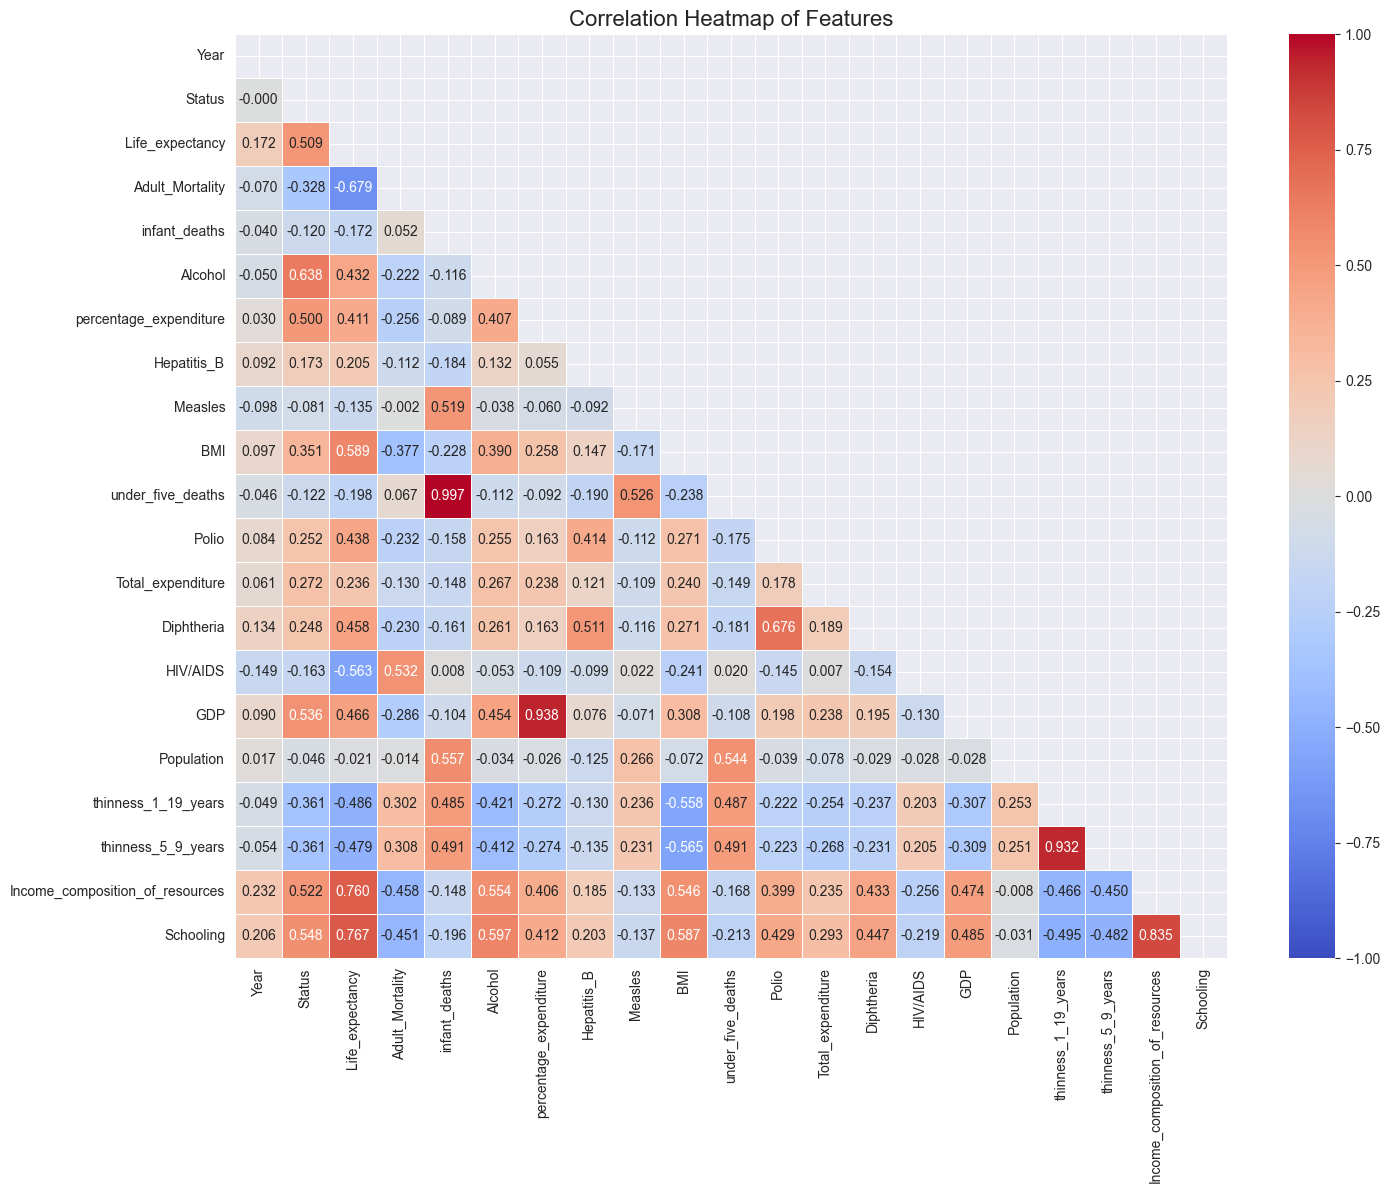

In [40]:
# Plot heatmap (Heatmap)
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Create a mask to show only the lower triangle (avoid duplicates)
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,       # show values
            fmt=".3f",        # show 3 decimal places
            cmap='coolwarm',  # color scheme: warm red, cool blue
            vmin=-1, vmax=1,  # set color range
            linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

In [41]:
# These two columns are highly correlated; we replace them with a new column `Thinness` that averages the two. Since we use a neural net it's optional, but we do it here.
df['Thinness']= df[['thinness_1_19_years', 'thinness_5_9_years']].mean(axis=1)
df.drop(columns= ['thinness_1_19_years', 'thinness_5_9_years'], inplace= True)

df['death_early']= df[['under_five_deaths', 'infant_deaths']].mean(axis=1)
df.drop(columns= ['under_five_deaths', 'infant_deaths'], inplace= True)

df['Development']= df[['Schooling', 'Income_composition_of_resources']].mean(axis=1)
df.drop(columns= ['Schooling', 'Income_composition_of_resources'], inplace= True)


In [42]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'Thinness', 'death_early', 'Development'],
      dtype='object')

In [43]:
df['Thinness'] = df.groupby('Status')['Thinness'].transform(lambda x: x.fillna(x.mean()))
df['BMI'] = df.groupby('Status')['BMI'].transform(lambda x: x.fillna(x.mean()))
df['GDP'] = df.groupby('Status')['GDP'].transform(lambda x: x.fillna(x.mean()))
df['Polio'] = df.groupby('Status')['Polio'].transform(lambda x: x.fillna(x.mean()))
df['Diphtheria'] = df.groupby('Status')['Diphtheria'].transform(lambda x: x.fillna(x.mean()))

In [44]:
# Final missing-value check
df.isnull().sum().sum()

np.int64(0)

In [45]:
# Descriptive statistics after processing
df.describe()

,Year,Status,Life_expectancy,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness,death_early,Development
count,2288.00000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2.288000e+03,2288.000000,2288.000000,2288.000000
mean,2007.50000,0.181818,68.677710,170.318182,4.672976,830.395829,79.562767,2546.665647,37.373666,81.182488,5.997560,81.275440,2.054808,6593.129961,1.274301e+07,4.928941,40.703890,6.235676
std,4.61078,0.385779,9.821124,128.943140,3.960247,2163.980281,22.818882,11543.343537,19.732089,23.860693,2.291706,23.884145,5.643700,13469.575672,6.098642e+07,4.600813,155.180429,1.811543
min,2000.00000,0.000000,36.300000,1.000000,0.010000,0.000000,2.000000,0.000000,1.400000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.000000,0.000000
25%,2003.75000,0.000000,62.200000,72.000000,1.100000,20.764380,77.704854,0.000000,18.800000,75.750000,4.470000,77.000000,0.100000,438.518297,1.967585e+05,1.550000,0.500000,5.142250
50%,2007.50000,0.000000,71.400000,147.000000,3.725000,94.155612,87.923372,18.000000,41.300000,92.000000,5.730000,91.000000,0.100000,1566.671611,1.383743e+06,3.300000,3.500000,6.375250
75%,2011.25000,0.000000,75.400000,237.000000,7.412500,491.637225,95.000000,436.750000,55.700000,96.000000,7.492500,96.000000,1.200000,4983.894687,7.414499e+06,7.212500,28.500000,7.516375
max,2015.00000,1.000000,89.000000,723.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,28.150000,2150.000000,10.804000


## Outlier checking

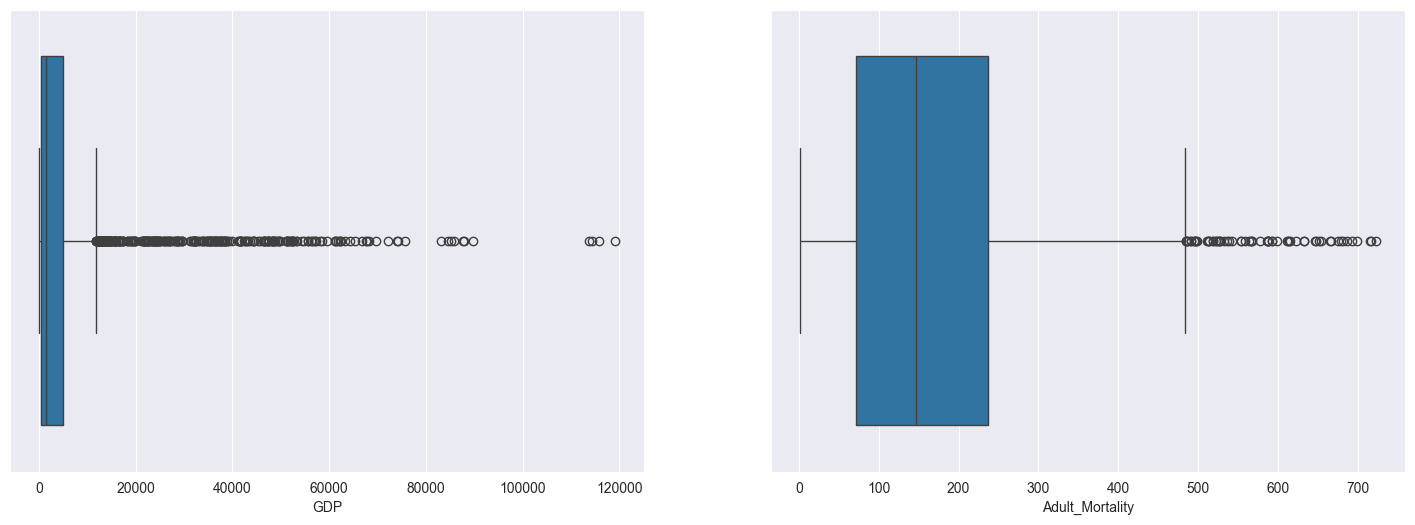

In [46]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(x=df['GDP'])
plt.subplot(1,2,2)
sns.boxplot(x= df['Adult_Mortality'])
plt.show()

In [47]:

def inspect_outlier_content(df, column_name):
    """
    Compute the IQR thresholds for a column and print details of all outliers (country, year, value).
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    print(f"====== Analyzing column: {column_name} ======")
    print(f"Normal range: {lower_bound:.2f} to {upper_bound:.2f}")
    print(f"Outliers: {len(outliers)} (ratio: {len(outliers)/len(df)*100:.2f}%)")
    
    if len(outliers) > 0:
        # Sort by value to see the largest/smallest ones
        top_outliers = outliers.sort_values(by=column_name, ascending=False)
        print("\n[Representative outlier samples (Top 10)]:")
        print(top_outliers[['Country', 'Year', 'Status', column_name]])
        
        # Count which countries these outliers mainly come from
        top_countries = outliers['Country'].value_counts().head(5).index.tolist()
        print(f"\n[Countries with the most outliers]: {', '.join(top_countries)}")
    print("-" * 50 + "\n")

target_cols = ['GDP', 'death_early', 'HIV/AIDS', 'Polio', 'Adult_Mortality']

for col in target_cols:
    inspect_outlier_content(df, col)

====== Analyzing column: GDP ======
Normal range: -6379.55 to 11801.96
Outliers: 324 (ratio: 14.16%)

[Representative outlier samples (Top 10)]:
         Country  Year  Status           GDP
1539  Luxembourg  2014       1  119172.74180
1542  Luxembourg  2011       1  115761.57700
1545  Luxembourg  2008       1  114293.84330
1540  Luxembourg  2013       1  113751.85000
1547  Luxembourg  2006       1   89739.71170
...          ...   ...     ...           ...
1527   Lithuania  2010       1   11984.86857
2815     Uruguay  2010       0   11938.21200
1647       Malta  2002       1   11843.93920
1528   Lithuania  2009       1   11837.39130
2358    Slovenia  2002       1   11814.99940

[324 rows x 4 columns]

[Countries with the most outliers]: Switzerland, Netherlands, Austria, Canada, France
--------------------------------------------------

====== Analyzing column: death_early ======
Normal range: -41.50 to 70.50
Outliers: 261 (ratio: 11.41%)

[Representative outlier samples (Top 10)]:
    

In [51]:
df.to_csv(path_or_buf=r'..\data\LifeExpectancyData_cleaned.csv', index=False)